In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DATA/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<AxesSubplot:xlabel='condition', ylabel='count'>

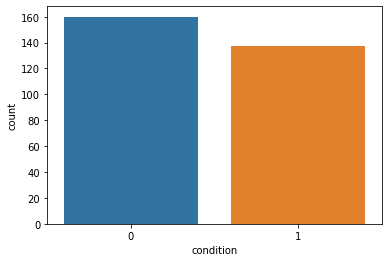

In [3]:
sns.countplot(x='condition',data=df)

### The data are not too imbalanced, so here I will not further balance them out

In [4]:
sum(df.isnull().any(axis=1))

0

### There is no missing value in the dataset

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

### Change some numerical data to categorical

In [7]:
df_cat=df.copy()

In [8]:
df_cat['sex']=df_cat['sex'].replace({0:'Female',1:'Male'})
df_cat['cp']=df_cat['cp'].replace({1:'Typical',2:'Atypical',3:'Non-anginal',4:'asymptomatic'})
df_cat['fbs']=df_cat['fbs'].replace({0:'<120',1:'>120'})
df_cat['restecg']=df_cat['restecg'].replace({0:'Normal',1:'ST-T wave abnormality',2:'left ventricular hypertrophy'})
df_cat['exang']=df_cat['exang'].replace({0:'no exercise induced angina',1:'exercise induced angina'})
df_cat['slope']=df_cat['slope'].replace({0:'upslope',1:'flat',2:'downslope'})
df_cat['thal']=df_cat['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})
df_cat['ca']=df_cat['ca'].replace({0:'0',1:'1',2:'2',3:'3'})

In [9]:
df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,Male,0,160,234,>120,left ventricular hypertrophy,131,no exercise induced angina,0.1,flat,1,0,0
1,69,Female,0,140,239,<120,Normal,151,no exercise induced angina,1.8,upslope,2,0,0
2,66,Female,0,150,226,<120,Normal,114,no exercise induced angina,2.6,downslope,0,0,0
3,65,Male,0,138,282,>120,left ventricular hypertrophy,174,no exercise induced angina,1.4,flat,1,0,1
4,64,Male,0,110,211,<120,left ventricular hypertrophy,144,exercise induced angina,1.8,flat,0,0,0


In [10]:
df_cat.dtypes

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal           int64
condition      int64
dtype: object

<AxesSubplot:>

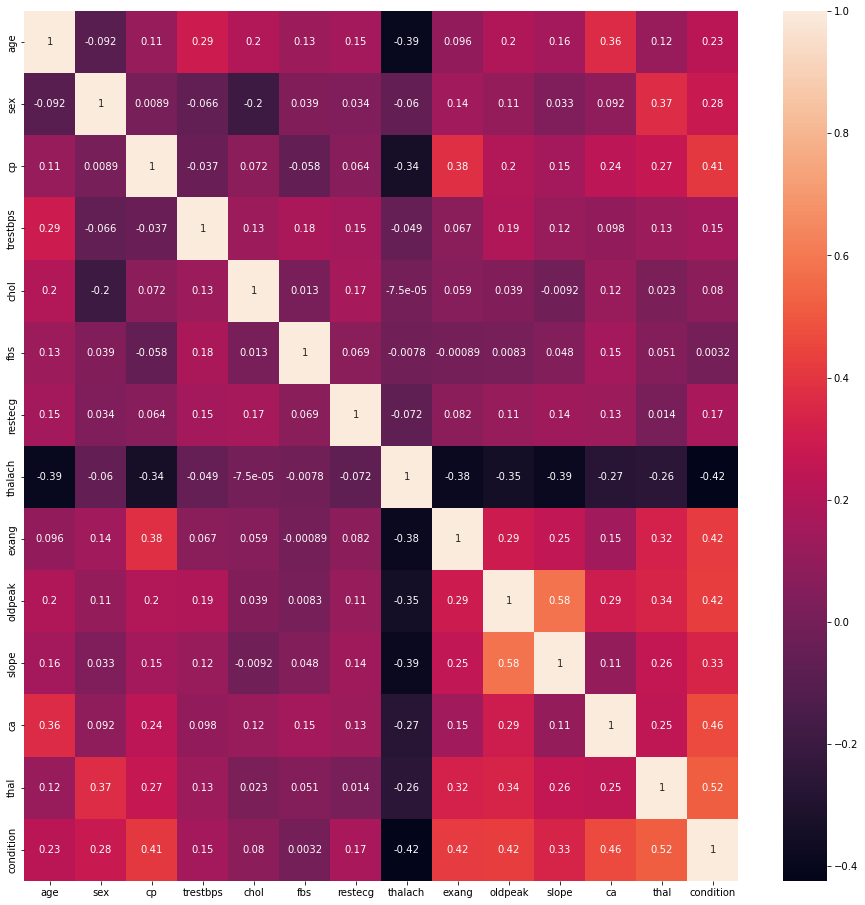

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(),annot=True)

[Text(0.5, 1.0, 'Count of Sex')]

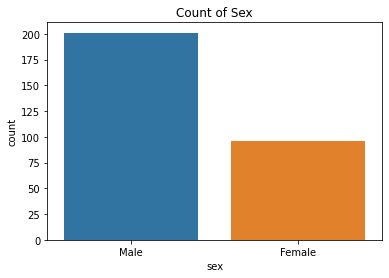

In [12]:
sns.countplot(x='sex',data=df_cat).set(title='Count of Sex')

[Text(0.5, 1.0, 'Count of Chest Pain')]

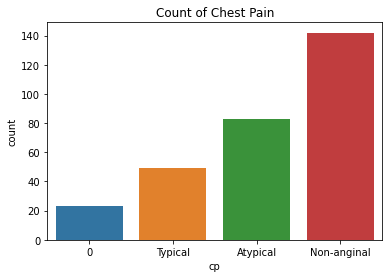

In [13]:
sns.countplot(x='cp',data=df_cat).set(title='Count of Chest Pain')

[Text(0.5, 1.0, 'Count of fasting blood sugar')]

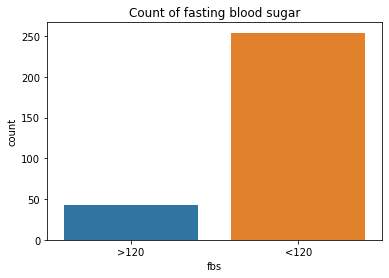

In [14]:
sns.countplot(x='fbs',data=df_cat).set(title='Count of fasting blood sugar')

<AxesSubplot:xlabel='age', ylabel='Count'>

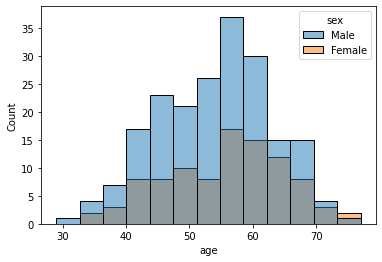

In [15]:
sns.histplot(x='age',hue='sex',data=df_cat)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

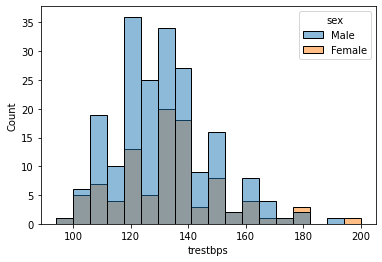

In [16]:
sns.histplot(x='trestbps',hue='sex',data=df_cat)

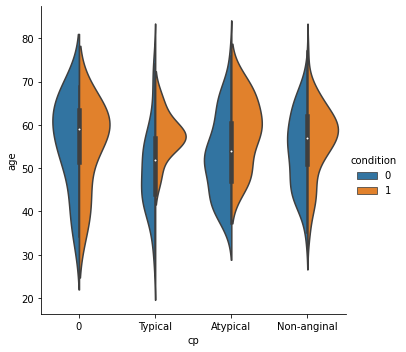

In [21]:
sns.catplot(data=df_cat,x='cp',y='age',hue='condition',kind="violin", split=True)

<AxesSubplot:xlabel='fbs', ylabel='count'>

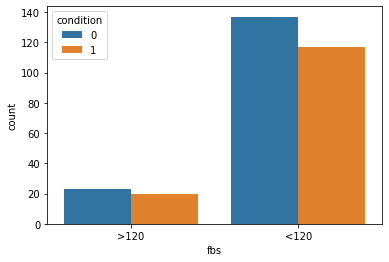

In [22]:
sns.countplot(x='fbs',data=df_cat,hue='condition')

## Apply one-hot encoding to categorical variables

In [26]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [27]:
df_cat

,age,trestbps,chol,thalach,oldpeak,thal,condition,sex_Male,cp_Atypical,cp_Non-anginal,cp_Typical,fbs_>120,restecg_ST-T wave abnormality,restecg_left ventricular hypertrophy,exang_no exercise induced angina,slope_flat,slope_upslope,ca_1,ca_2,ca_3
0,69,160,234,131,0.1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0
1,69,140,239,151,1.8,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,66,150,226,114,2.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,65,138,282,174,1.4,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0
4,64,110,211,144,1.8,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,181,0.0,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0
293,39,118,219,140,1.2,2,1,1,0,1,0,0,0,0,1,1,0,0,0,0
294,35,120,198,130,1.6,2,1,1,0,1,0,0,0,0,0,1,0,0,0,0
295,35,138,183,182,1.4,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [28]:
X=df_cat.drop(['condition'],axis=1)
y=df_cat.condition
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [31]:
scaler=MinMaxScaler()

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=69)

In [35]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

array([[0.58333333, 0.35849057, 0.18493151, ..., 0.        , 0.        ,
        0.        ],
       [0.85416667, 0.58490566, 0.2716895 , ..., 0.        , 0.        ,
        0.        ],
       [0.47916667, 0.22641509, 0.1369863 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54166667, 0.35849057, 0.49315068, ..., 0.        , 0.        ,
        0.        ],
       [0.72916667, 0.29245283, 0.41780822, ..., 0.        , 0.        ,
        0.        ],
       [0.60416667, 0.52830189, 0.35844749, ..., 0.        , 0.        ,
        0.        ]])